# Constrained optimization: Augmented Lagrangian Method
* ## Giacomo Bacchetta, bacchetta.1840949@studenti.uniroma1.it
* ## Edoardo Cesaroni, cesaroni.1841742@studenti.uniroma1.it 

## Support's functions

We import the python libraries useful for the implementation of the method. These are:
- $\bf{Numpy}$, which contains several math functions;
- $\bf{Autograd}$, used to calculate the gradient (*grad*) of several functions;
- $\bf{AIL}$, which allows us to use simple mathematical functions;
- $\bf{matplotlib}$, which allows us to graphically represent the results of the algorithm.

In [1]:
import numpy as np
from autograd import grad
from AIL import newton_troncato 
import matplotlib.pyplot as plt

### KKT Conditions

This function allows to verify with an accuracy equal to Epsilon how much a point respects the Karush-Kuhn-Tucker conditions that are the necessary conditions of first order for a constrained optimization problem.

In [2]:
def verify_KKT(f, g, h, x, lam, mu):
    ep = 1e-4

    kkt = grad(f)(x)+sum(lam[i]*grad(g[i])(x) for i in range(len(g))) + sum(mu[j]*grad(h[j])(x) for j in range(len(h)))
    compl = sum(lam[i]*g[i](x) for i in range(len(g)))

    for i in range(len(g)):
        if g[i](x) > ep or lam[i]*g[i](x) > ep or lam[i]*g[i](x) < -ep:
            return [False, np.linalg.norm(kkt), compl]
    for j in range(len(h)):
        if h[j](x) > ep or h[j](x) < -ep:
            return [False, np.linalg.norm(kkt), compl]

    lb = np.zeros(len(kkt))
    ub = np.zeros(len(kkt))

    for i in range(len(kkt)):
        lb[i] = -ep
        ub[i] = ep
        
    if np.linalg.norm(kkt) < 1e-3:
        return [True, np.linalg.norm(kkt), compl]

    if (kkt > ub).any() or (kkt < lb).any():
        return [False, np.linalg.norm(kkt), compl]

    return [True, np.linalg.norm(kkt), compl]

### Other useful function

*L* represents the lagrangian function.

In [3]:
def L(x):
    return f(x) + sum(h[j](x)*mu[j] for j in range(len(h)))+sum(lam[i]*max(g[i](x),((-epsilon_p)/2)*lam[i]) for i in range(len(g))) + (1/epsilon_p)*sum(max((- epsilon_p/2 * lam[i]), g[i](x))**2 for i in range(len(g))) + (1/epsilon_p)*sum(h[j](x)**2 for j in range(len(h)))

## Augmented Lagrangian Method

### Plotting delle curve di livello

In [4]:
def contourf_plot(x, k):
    
    plt.figure()
    plt.xlabel("X1")
    plt.ylabel("X2")

    cx = np.linspace(-4, 4, 80)
    cy = np.linspace(-4, 4, 80)

    z = np.ndarray((len(cx),len(cy)))

    for o in range(0, len(cx)):
        for p in range(0, len(cy)):
            xcalc = np.array([cx[o],cy[p]])
            z[o][p] = L(xcalc)

    plt.contourf(cx, cy, z)

    x1 = x[k][0]
    x2 = x[k][1]
    plt.scatter(x1,x2, color = 'black')

    plt.show()

### Final plotting function

In [5]:
def ending_plot(x, k):
    
        fig, axes = plt.subplots(1,1)

        plt.xlabel("X1")
        plt.ylabel("X2")

        cx = np.linspace(-4, 4, 80)
        cy = np.linspace(-4, 4, 80)

        z = np.ndarray((len(cx),len(cy)))
        lollo = np.ndarray((len(cx),len(cy)))

        for o in range(0, len(cx)):
            for p in range(0, len(cy)):
                xcalc = np.array([cx[o],cy[p]])
                z[o][p] = f(xcalc)

        plt.contourf(cx, cy, z)
        
        x1 = x[k][0]
        x2 = x[k][1]

        plt.scatter(x1,x2, color='black')

        if g == []:
            draw_circle = plt.Circle((0, 0), 1, fill=False, color = 'red')
            axes.set_aspect(0.7)
            axes.add_artist(draw_circle)

        else:
            x_3p = np.linspace(-4,4,100)
            y_3p = (x_3p + 1)/2
            x_3p1 = np.linspace(-2,2,100)
            y_3p1 = (1 - (x_3p1**2)/4)**0.5 

            axes.set_aspect(0.7)
            plt.plot(x_3p, y_3p, 'r')
            plt.plot(x_3p1, y_3p1, 'b')


        plt.show()

### Main 

In [6]:
def aug_lag(f, g, h, x0):
    
    global epsilon_p
    global mu
    global lam

    x = []
    x.append(x0)

    epsilon = 1   
    beta = 2
    tau = 1
    rho = 1e-10
    
    epsilon_p = epsilon
    
    lam = []
    mu = []

    for i in range(len(g)):
        lam.append((max(0, g[i](x0)))*2)

    for j in range(len(h)):
        mu.append((h[j](x0))*2)
        
    k = 0
    while k <= 50:
        
        epsilon_p = epsilon
   
        m = newton_troncato(L, x[k], tau)[0]
        x.append(m)
        
        k = k + 1
        

        if np.linalg.norm(grad(L)(x[k])) < rho:

            print('Exit for L norm condition: ', np.linalg.norm(grad(L)(x[k])) )
            print('The optimum point is:', x[k], 'and the value of the objective function is: ', f(x[k]))
            print('The list of lambda coefficients is: ', lam)
            print('The list of mu coefficients is: ', mu)
            
            if len(x0) == 2:
                contourf_plot(x, k)
                ending_plot(x, k)
                
            return (x[k], lam, mu)
        
        
        if verify_KKT(f, g, h, x[k], lam, mu)[0] == True:
            
            print('Exit for KKT condition. Value of KKT norm is: ', verify_KKT(f, g, h, x[k], lam, mu)[1])
            print('The optimum point is:', x[k], 'and the value of the objective function is: ', f(x[k]))
            print('The list of lambda coefficients is: ', lam)
            print('The list of mu coefficients is: ', mu)
            print('Value of the L gradient norm:', np.linalg.norm(grad(L)(x[k])))
            
            if len(x0) == 2:
                contourf_plot(x, k)
                ending_plot(x, k)
                
            return (x[k], lam, mu)
        
        
        for i in range(len(g)):
            lam[i] = lam[i] + (2/epsilon) * max(g[i](x[k]), (-epsilon/2) * lam[i])

        for j in range(len(h)):
            mu[j] = mu[j] + (2/epsilon) * h[j](x[k])
        
        epsilon = epsilon/beta
            
        tau = tau * 0.3

    print('Exit for end iterations')
    print('The optimum point is:', x[k], 'and the value of the objective function is: ', f(x[k]))
    print('The list of lambda coefficients is: ', lam)
    print('The list of mu coefficients is: ', mu)
    print('Value of the L gradient norm:', np.linalg.norm(grad(L)(x[k])))
    
    if len(x0) == 2:
        contourf_plot(x, k)
        ending_plot(x, k)
        
    return (x[k], lam, mu)

## IMPLEMENTATION TEST

* ### Problem 1

Exit for KKT condition. Value of KKT norm is:  7.479924034704434e-05
The optimum point is: [0.70710658 0.70710658] and the value of the objective function is:  -1.4142131549642725
The list of lambda coefficients is:  []
The list of mu coefficients is:  [0.7071443845219652]
Value of the L gradient norm: 1.0503976808445227e-06


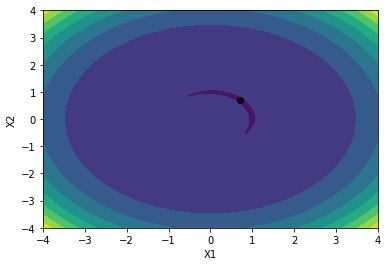

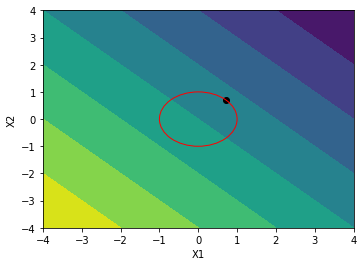

(array([0.70710658, 0.70710658]), [], [0.7071443845219652])

In [7]:
g = []
h = []

def f(x):
    return -x[0]-x[1]

def h1(x):
    return x[0]**2 + x[1]**2 - 1
h.append(h1)

x0 = np.array([-1.,-1.])


aug_lag(f, g, h, x0)

* ### Maratos' problem

Exit for KKT condition. Value of KKT norm is:  0.000668918232703713
The optimum point is: [ 9.99999736e-01 -6.68874810e-04] and the value of the objective function is:  -0.9999998985357933
The list of lambda coefficients is:  []
The list of mu coefficients is:  [-1.500003901156717]
Value of the L gradient norm: 0.0006694809032741134


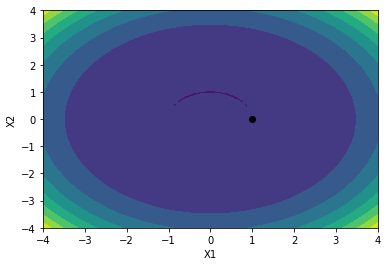

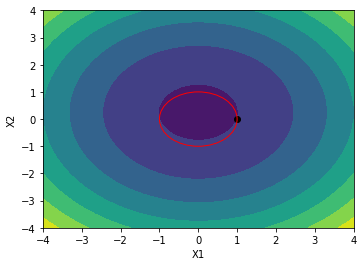

(array([ 9.99999736e-01, -6.68874810e-04]), [], [-1.500003901156717])

In [8]:
g = []
h = []

def f(x):
    return -x[0] + 2*(x[0]**2 + x[1]**2 -1)

def h1(x):
    return x[0]**2 + x[1]**2 - 1
h.append(h1)

x0 = np.array([-1. , -1.])


aug_lag(f, g, h, x0)

* ### Problem HS14

Exit for KKT condition. Value of KKT norm is:  3.1728957415007534e-06
The optimum point is: [0.82286772 0.91143556] and the value of the objective function is:  1.3934840743568566
The list of lambda coefficients is:  [1.8466160955571231]
The list of mu coefficients is:  [1.5945057574231338]
Value of the L gradient norm: 0.0023742875250582964


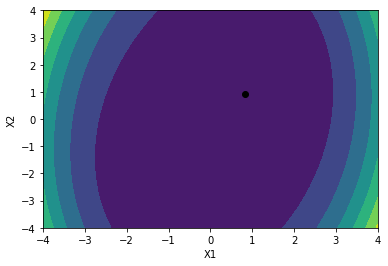

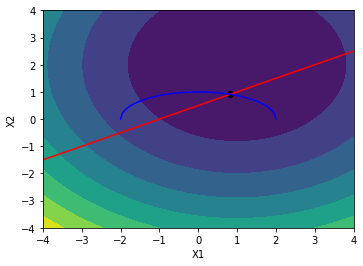

(array([0.82286772, 0.91143556]), [1.8466160955571231], [1.5945057574231338])

In [9]:
g = []
h = []

def f(x):
    return (x[0]-2)**2 + (x[1]-1)**2

def g1(x):
    return (x[0]**2)/4 + x[1]**2 - 1
g.append(g1)

def h1(x):
    return x[0] - 2*x[1] + 1
h.append(h1)

x0 = np.array([2. , 2.])


aug_lag(f, g, h, x0)

* ### Problem HS41

In [10]:
g = []
h = []

def f(x):
    return 2-x[0]*x[1]*x[2]

def h1(x):
    return (x[0]+2*x[1]+2*x[2]-x[3])
h.append(h1)

def g1(x):
    return (x[0]-1) 
g.append(g1)

def g2(x):
    return -(x[0]) 
g.append(g2)

def g3(x):
    return -(x[1]) 
g.append(g3)

def g4(x):
    return -(x[2]) 
g.append(g4)

def g5(x):
    return -(x[3])
g.append(g5)

def g6(x):
    return (x[1]-1) 
g.append(g6)

def g7(x):
    return (x[2]-1) 
g.append(g7)

def g8(x):
    return (x[3]-1) 
g.append(g8)

x0 = np.array([2.0,2.0,2.0,2.0])


aug_lag(f, g, h, x0)

Exit for KKT condition. Value of KKT norm is:  0.0007177949812547051
The optimum point is: [0.3274852  0.16812701 0.16812701 0.99999108] and the value of the objective function is:  1.990743076488402
The list of lambda coefficients is:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027780182182193247]
The list of mu coefficients is:  [0.02765404324929177]
Value of the L gradient norm: 0.003326582327801289


(array([0.3274852 , 0.16812701, 0.16812701, 0.99999108]),
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.027780182182193247],
 [0.02765404324929177])

* ### Problem HS32

In [11]:
g = []
h = []

def f(x):
    return (x[0]+ 3*x[1]+ x[2])**2 + 4*(x[0]-x[1])**2

def h1(x):
    return x[0] + x[1] + x[2] -1
h.append(h1)

def g1(x):
    return -6*x[1] - 4*x[2] + x[0]**3 + 3
g.append(g1)

def g2(x):
    return -x[0]
g.append(g2)

def g3(x):
    return -x[1]
g.append(g3)

def g4(x):
    return -x[2]
g.append(g4)

x0 = np.array([0.1,0.7,0.2])


aug_lag(f, g, h, x0)

Exit for KKT condition. Value of KKT norm is:  4.545674804597757e-05
The optimum point is: [ 4.80199496e-06 -2.38217143e-06  9.99997473e-01] and the value of the objective function is:  0.9999902577284485
The list of lambda coefficients is:  [0.0, 0.0, 3.99991213298043, 0.0]
The list of mu coefficients is:  [-2.000004828917133]
Value of the L gradient norm: 0.0025563594392414134


(array([ 4.80199496e-06, -2.38217143e-06,  9.99997473e-01]),
 [0.0, 0.0, 3.99991213298043, 0.0],
 [-2.000004828917133])

* ### Problem HS60

In [12]:
g = []
h = []

def f(x):
    return (x[0]-1)**2+(x[0]- x[1])**2+(x[1]-x[2])**4

def h1(x):
    return (x[0]*(1+x[1]**2)+x[2]**4-4-3*2**0.5)
h.append(h1)

def g1(x):
    return (x[0]-10) 
g.append(g1)

def g2(x):
    return -(x[0]+10) 
g.append(g2)

def g3(x):
    return -(x[1]+10) 
g.append(g3)

def g4(x):
    return -(x[2]+10) 
g.append(g4)

def g5(x):
    return (x[1]-10)
g.append(g5)

def g6(x):
    return (x[2]-10) 
g.append(g6)

x0 = np.array([2.0,2.0,2.0])


aug_lag(f, g, h, x0)

Exit for KKT condition. Value of KKT norm is:  5.331797506213554e-05
The optimum point is: [1.10484924 1.19665543 1.53526623] and the value of the objective function is:  0.03256803052236032
The list of lambda coefficients is:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The list of mu coefficients is:  [-0.010728066873639364]
Value of the L gradient norm: 0.03029867227828999


(array([1.10484924, 1.19665543, 1.53526623]),
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.010728066873639364])